In [4]:
# upload the dataset
from google.colab import files
uploaded = files.upload()

Saving marks_dataset.xlsx to marks_dataset.xlsx


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor
from sklearn.utils import resample
import warnings

In [5]:
# columns for final dataset
columns = [
    "As:1", "As:2", "As:3", "As:4", "As:5", "As:5_availability",
    "As:6", "As:6_availability", "Assignment_Total",

    "Qz:1", "Qz:2", "Qz:3", "Qz:4", "Qz:5", "Qz:6", "Qz:7",
    "Qz:7_availability", "Qz:8", "Qz:8_availability", "Quiz_Total",

    "SI:1", "SI:2", "SI:2_availability", "SI:3",
    "SI:3_availability", "SI_Total",

    "SII:1", "SII:2", "SII:2_availability", "SII:3",
    "SII:3_availability", "SII_Total",

    "Project_availability", "Project_Total",

    "Final:1", "Final:2", "Final:2_availability",
    "Final:3", "Final:3_availability",

    "Final:4", "Final:4_availability",
    "Final:5", "Final:5_availability",
    "Final_Total"
]

# Create empty dataframe
Dataset = pd.DataFrame(columns=columns)

Dataset

,As:1,As:2,As:3,As:4,As:5,As:5_availability,As:6,As:6_availability,Assignment_Total,Qz:1,...,Final:1,Final:2,Final:2_availability,Final:3,Final:3_availability,Final:4,Final:4_availability,Final:5,Final:5_availability,Final_Total


In [6]:
# merge sheets one by one after cleaning them all
# sheet 1 cleaning

filename = list(uploaded.keys())[0]
df = pd.read_excel(filename, sheet_name=0)

weights = df.iloc[0]

totals = df.iloc[1]

df_clean = df.drop(index=[0, 1, 2]).reset_index(drop=True)

exclude_cols = ["S-I","S-II","Final"]

for col in df_clean.columns:
    if col not in exclude_cols and col not in ["index", "Unnamed: 0"]:
        total_mark = totals[col]
        weight = weights[col]

        # Only convert numeric columns
        df_clean[col] = df_clean[col].astype(float)

        # Apply formula
        df_clean[col] = round((df_clean[col] / total_mark) * weight, 2)

df_clean = df_clean.fillna(df_clean.mean())

# NOW push the clean data into the main dataframe

for i in range(len(df_clean)):
    row = df_clean.iloc[i]

    # -------------------------
    # ASSIGNMENTS
    # -------------------------
    As1 = row["As:1"]
    As2 = row["As:2"]
    As3 = row["As:3"]
    As4 = row["As:4"]
    As5 = row["As:5"]
    As6 = row["As:6"]

    As5_avail = 1 if not pd.isna(row["As:5"]) else 0
    As6_avail = 1 if not pd.isna(row["As:6"]) else 0

    Assignment_Total = As1 + As2 + As3 + As4 + As5 + As6

    # -------------------------
    # QUIZZES
    # -------------------------
    Q1 = row["Qz:1"]
    Q2 = row["Qz:2"]
    Q3 = row["Qz:3"]
    Q4 = row["Qz:4"]
    Q5 = row["Qz:5"]
    Q6 = row["Qz:6"]
    Q7 = row["Qz:7"]
    Q8 = row["Qz:8"]

    Q7_avail = 1 if not pd.isna(row["Qz:7"]) else 0
    Q8_avail = 1 if not pd.isna(row["Qz:8"]) else 0

    Quiz_Total = Q1 + Q2 + Q3 + Q4 + Q5 + Q6 + Q7 + Q8

    # -------------------------
    # SECTIONAL - I
    # -------------------------
    SI1 = row["S-I:1"]
    SI2 = 0
    SI3 = 0

    SI2_avail = 0
    SI3_avail = 0

    SI_Total = SI1 + SI2 + SI3

    # -------------------------
    # SECTIONAL - II
    # -------------------------
    SII1 = row["S-II:1"]
    SII2 = 0
    SII3 = 0

    SII2_avail = 0
    SII3_avail = 0

    SII_Total = SII1 + SII2 + SII3

    # -------------------------
    # PROJECT (does not exist in your dataset)
    # -------------------------
    Project_availability = 0
    Project_Total = 0

    # -------------------------
    # FINAL EXAM
    # -------------------------
    Final1 = row["Final"]
    Final2 = 0
    Final3 = 0
    Final4 = 0
    Final5 = 0

    Final2_avail = 0
    Final3_avail = 0
    Final4_avail = 0
    Final5_avail = 0

    Final_Total = Final1

    # -------------------------
    # APPEND ROW TO DATASET
    # -------------------------
    Dataset.loc[len(Dataset)] = [
        # Assignments
        As1, As2, As3, As4, As5, As5_avail,
        As6, As6_avail, Assignment_Total,

        # Quizzes
        Q1, Q2, Q3, Q4, Q5, Q6, Q7,
        Q7_avail, Q8, Q8_avail, Quiz_Total,

        # SI
        SI1, SI2, SI2_avail, SI3, SI3_avail, SI_Total,

        # SII
        SII1, SII2, SII2_avail, SII3, SII3_avail, SII_Total,

        # Project
        Project_availability, Project_Total,

        # Final
        Final1, Final2, Final2_avail,
        Final3, Final3_avail,
        Final4, Final4_avail,
        Final5, Final5_avail,
        Final_Total
    ]

Dataset



/tmp/ipython-input-518947471.py:26: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean = df_clean.fillna(df_clean.mean())


,As:1,As:2,As:3,As:4,As:5,As:5_availability,As:6,As:6_availability,Assignment_Total,Qz:1,...,Final:1,Final:2,Final:2_availability,Final:3,Final:3_availability,Final:4,Final:4_availability,Final:5,Final:5_availability,Final_Total
0,1.86,2.59,2.45,2.43,1.480000,1.0,2.350000,1.0,13.160000,1.4,...,16.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.08
1,1.67,2.91,1.30,2.10,2.010000,1.0,2.370000,1.0,12.360000,1.0,...,24.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.07
2,2.61,2.66,0.00,2.82,2.000000,1.0,2.670000,1.0,12.760000,1.4,...,14.62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.62
3,1.41,1.86,0.00,1.32,2.030937,1.0,1.670000,1.0,8.290938,0.6,...,12.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.60
4,2.40,2.87,2.42,2.70,3.000000,1.0,3.000000,1.0,16.390000,2.0,...,33.63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.63
5,0.00,2.23,2.03,1.23,1.380000,1.0,1.930000,1.0,8.800000,1.8,...,17.77,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.77
6,2.72,2.66,2.85,2.37,2.720000,1.0,3.000000,1.0,16.320000,2.0,...,31.72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.72
7,0.00,2.01,1.47,1.38,1.270000,1.0,2.351333,1.0,8.481333,0.8,...,5.96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.96
8,2.42,2.79,2.25,2.82,2.330000,1.0,2.900000,1.0,15.510000,1.4,...,26.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.21
9,2.61,2.53,1.72,1.98,1.650000,1.0,1.630000,1.0,12.120000,1.8,...,12.48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.48


In [7]:
# sheet 2 cleaning

filename = list(uploaded.keys())[0]
df = pd.read_excel(filename, sheet_name=1)

weights = df.iloc[0]

totals = df.iloc[1]

df_clean = df.drop(index=[0, 1, 2]).reset_index(drop=True)

exclude_cols = ["S-I","S-II","Final"]

for col in df_clean.columns:
    if col not in exclude_cols and col not in ["index", "Unnamed: 0"]:
        total_mark = totals[col]
        weight = weights[col]

        # Only convert numeric columns
        df_clean[col] = df_clean[col].astype(float)

        # Apply formula
        df_clean[col] = round((df_clean[col] / total_mark) * weight, 2)

df_clean = df_clean.fillna(df_clean.mean())

# NOW push the clean data into the main dataframe

for i in range(len(df_clean)):
    row = df_clean.iloc[i]

    # -------------------------
    # ASSIGNMENTS
    # -------------------------
    As1 = row["As:1"]
    As2 = row["As:2"]
    As3 = row["As:3"]
    As4 = row["As:4"]
    As5 = row["As:5"]
    As6 = row["As:6"]

    As5_avail = 1 if not pd.isna(row["As:5"]) else 0
    As6_avail = 1 if not pd.isna(row["As:6"]) else 0

    Assignment_Total = As1 + As2 + As3 + As4 + As5 + As6

    # -------------------------
    # QUIZZES
    # -------------------------
    Q1 = row["Qz:1"]
    Q2 = row["Qz:2"]
    Q3 = row["Qz:3"]
    Q4 = row["Qz:4"]
    Q5 = row["Qz:5"]
    Q6 = row["Qz:6"]
    Q7 = row["Qz:7"]
    Q8 = row["Qz:8"]

    Q7_avail = 1 if not pd.isna(row["Qz:7"]) else 0
    Q8_avail = 1 if not pd.isna(row["Qz:8"]) else 0

    Quiz_Total = Q1 + Q2 + Q3 + Q4 + Q5 + Q6 + Q7 + Q8

    # -------------------------
    # SECTIONAL - I
    # -------------------------
    SI1 = row["S-I:1"]
    SI2 = 0
    SI3 = 0

    SI2_avail = 0
    SI3_avail = 0

    SI_Total = SI1 + SI2 + SI3

    # -------------------------
    # SECTIONAL - II
    # -------------------------
    SII1 = row["S-II:1"]
    SII2 = 0
    SII3 = 0

    SII2_avail = 0
    SII3_avail = 0

    SII_Total = SII1 + SII2 + SII3

    # -------------------------
    # PROJECT
    # -------------------------
    Project_availability = 0
    Project_Total = 0

    # -------------------------
    # FINAL EXAM
    # -------------------------
    Final1 = row["Final"]
    Final2 = 0
    Final3 = 0
    Final4 = 0
    Final5 = 0

    Final2_avail = 0
    Final3_avail = 0
    Final4_avail = 0
    Final5_avail = 0

    Final_Total = Final1

    # -------------------------
    # APPEND ROW TO DATASET
    # -------------------------
    Dataset.loc[len(Dataset)] = [
        # Assignments
        As1, As2, As3, As4, As5, As5_avail,
        As6, As6_avail, Assignment_Total,

        # Quizzes
        Q1, Q2, Q3, Q4, Q5, Q6, Q7,
        Q7_avail, Q8, Q8_avail, Quiz_Total,

        # SI
        SI1, SI2, SI2_avail, SI3, SI3_avail, SI_Total,

        # SII
        SII1, SII2, SII2_avail, SII3, SII3_avail, SII_Total,

        # Project
        Project_availability, Project_Total,

        # Final
        Final1, Final2, Final2_avail,
        Final3, Final3_avail,
        Final4, Final4_avail,
        Final5, Final5_avail,
        Final_Total
    ]

Dataset


/tmp/ipython-input-2537268924.py:25: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean = df_clean.fillna(df_clean.mean())


,As:1,As:2,As:3,As:4,As:5,As:5_availability,As:6,As:6_availability,Assignment_Total,Qz:1,...,Final:1,Final:2,Final:2_availability,Final:3,Final:3_availability,Final:4,Final:4_availability,Final:5,Final:5_availability,Final_Total
0,1.86,2.59,2.45,2.43,1.480000,1.0,2.3500,1.0,13.160000,1.4,...,16.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.08
1,1.67,2.91,1.30,2.10,2.010000,1.0,2.3700,1.0,12.360000,1.0,...,24.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.07
2,2.61,2.66,0.00,2.82,2.000000,1.0,2.6700,1.0,12.760000,1.4,...,14.62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.62
3,1.41,1.86,0.00,1.32,2.030937,1.0,1.6700,1.0,8.290938,0.6,...,12.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.60
4,2.40,2.87,2.42,2.70,3.000000,1.0,3.0000,1.0,16.390000,2.0,...,33.63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,1.78,2.79,1.11,2.04,2.000000,1.0,2.0300,1.0,11.750000,1.0,...,12.82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.82
58,0.00,2.14,1.68,1.98,2.220000,1.0,2.1400,1.0,10.160000,0.8,...,17.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.32
59,0.00,2.40,0.76,0.84,2.231481,1.0,2.2488,1.0,8.480281,0.8,...,2.47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.47
60,0.00,2.66,2.46,2.10,2.880000,1.0,2.1400,1.0,12.240000,1.4,...,21.48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.48


In [8]:
# sheet 3 cleaning

filename = list(uploaded.keys())[0]
df = pd.read_excel(filename, sheet_name=2)

weights = df.iloc[0]

totals = df.iloc[1]

df_clean = df.drop(index=[0, 1, 2]).reset_index(drop=True)

exclude_cols = ["S-I","S-II","Proj","Final"]

for col in df_clean.columns:
    if col not in exclude_cols and col not in ["index", "Unnamed: 0"]:
        total_mark = totals[col]
        weight = weights[col]

        # Only convert numeric columns
        df_clean[col] = df_clean[col].astype(float)

        # Apply formula
        df_clean[col] = round((df_clean[col] / total_mark) * weight, 2)

df_clean = df_clean.fillna(df_clean.mean())

# NOW push the clean data into the main dataframe

for i in range(len(df_clean)):
    row = df_clean.iloc[i]

    # -------------------------
    # ASSIGNMENTS
    # -------------------------
    As1 = row["As:1"]
    As2 = row["As:2"]
    As3 = row["As:3"]
    As4 = row["As:4"]
    As5 = row["As:5"]
    As6 = 0

    As5_avail = 1 if not pd.isna(row["As:5"]) else 0
    As6_avail = 0

    Assignment_Total = As1 + As2 + As3 + As4 + As5 + As6

    # -------------------------
    # QUIZZES
    # -------------------------
    Q1 = row["Qz:1"]
    Q2 = row["Qz:2"]
    Q3 = row["Qz:3"]
    Q4 = row["Qz:4"]
    Q5 = row["Qz:5"]
    Q6 = row["Qz:6"]
    Q7 = row["Qz:7"]
    Q8 = 0

    Q7_avail = 1 if not pd.isna(row["Qz:7"]) else 0
    Q8_avail = 0

    Quiz_Total = Q1 + Q2 + Q3 + Q4 + Q5 + Q6 + Q7 + Q8

    # -------------------------
    # SECTIONAL - I
    # -------------------------
    SI1 = row["S-I:1"]
    SI2 = 0
    SI3 = 0

    SI2_avail = 0
    SI3_avail = 0

    SI_Total = SI1 + SI2 + SI3

    # -------------------------
    # SECTIONAL - II
    # -------------------------
    SII1 = row["S-II:1"]
    SII2 = 0
    SII3 = 0

    SII2_avail = 0
    SII3_avail = 0

    SII_Total = SII1 + SII2 + SII3

    # -------------------------
    # PROJECT
    # -------------------------
    Project_availability = 1
    Project_Total = row["Proj"]

    # -------------------------
    # FINAL EXAM
    # -------------------------
    Final1 = row["Final"]
    Final2 = 0
    Final3 = 0
    Final4 = 0
    Final5 = 0

    Final2_avail = 0
    Final3_avail = 0
    Final4_avail = 0
    Final5_avail = 0

    Final_Total = Final1

    # -------------------------
    # APPEND ROW TO DATASET
    # -------------------------
    Dataset.loc[len(Dataset)] = [
        # Assignments
        As1, As2, As3, As4, As5, As5_avail,
        As6, As6_avail, Assignment_Total,

        # Quizzes
        Q1, Q2, Q3, Q4, Q5, Q6, Q7,
        Q7_avail, Q8, Q8_avail, Quiz_Total,

        # SI
        SI1, SI2, SI2_avail, SI3, SI3_avail, SI_Total,

        # SII
        SII1, SII2, SII2_avail, SII3, SII3_avail, SII_Total,

        # Project
        Project_availability, Project_Total,

        # Final
        Final1, Final2, Final2_avail,
        Final3, Final3_avail,
        Final4, Final4_avail,
        Final5, Final5_avail,
        Final_Total
    ]

Dataset

/tmp/ipython-input-2206280565.py:25: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean = df_clean.fillna(df_clean.mean())


,As:1,As:2,As:3,As:4,As:5,As:5_availability,As:6,As:6_availability,Assignment_Total,Qz:1,...,Final:1,Final:2,Final:2_availability,Final:3,Final:3_availability,Final:4,Final:4_availability,Final:5,Final:5_availability,Final_Total
0,1.86,2.59,2.45,2.43,1.480000,1.0,2.35,1.0,13.160000,1.40,...,16.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.08
1,1.67,2.91,1.30,2.10,2.010000,1.0,2.37,1.0,12.360000,1.00,...,24.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.07
2,2.61,2.66,0.00,2.82,2.000000,1.0,2.67,1.0,12.760000,1.40,...,14.62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.62
3,1.41,1.86,0.00,1.32,2.030937,1.0,1.67,1.0,8.290938,0.60,...,12.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.60
4,2.40,2.87,2.42,2.70,3.000000,1.0,3.00,1.0,16.390000,2.00,...,33.63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,2.86,2.36,2.50,0.00,2.950000,1.0,0.00,0.0,10.670000,1.16,...,10.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.45
102,3.16,3.22,3.09,3.31,3.280000,1.0,0.00,0.0,16.060000,1.16,...,13.54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.54
103,3.00,3.08,3.31,3.19,3.420000,1.0,0.00,0.0,16.000000,1.41,...,12.54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.54
104,2.06,2.94,3.16,0.00,0.000000,1.0,0.00,0.0,8.160000,0.66,...,8.18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.18


In [9]:
# sheet 4 cleaning

filename = list(uploaded.keys())[0]
df = pd.read_excel(filename, sheet_name=3)

weights = df.iloc[0]

totals = df.iloc[1]

df_clean = df.drop(index=[0, 1, 2]).reset_index(drop=True)

exclude_cols = ["S-I","S-II","Final"]

for col in df_clean.columns:
    if col not in exclude_cols and col not in ["index", "Unnamed: 0"]:
        total_mark = totals[col]
        weight = weights[col]

        # Only convert numeric columns
        df_clean[col] = df_clean[col].astype(float)

        # Apply formula
        df_clean[col] = round((df_clean[col] / total_mark) * weight, 2)

df_clean = df_clean.fillna(df_clean.mean())

# NOW push the clean data into the main dataframe

for i in range(len(df_clean)):
    row = df_clean.iloc[i]

    # -------------------------
    # ASSIGNMENTS
    # -------------------------
    As1 = row["As:1"]
    As2 = row["As:2"]
    As3 = row["As:3"]
    As4 = row["As:4"]
    As5 = row["As:5"]
    As6 = 0

    As5_avail = 1 if not pd.isna(row["As:5"]) else 0
    As6_avail = 0

    Assignment_Total = As1 + As2 + As3 + As4 + As5 + As6

    # -------------------------
    # QUIZZES
    # -------------------------
    Q1 = row["Qz:1"]
    Q2 = row["Qz:2"]
    Q3 = row["Qz:3"]
    Q4 = row["Qz:4"]
    Q5 = row["Qz:5"]
    Q6 = row["Qz:6"]
    Q7 = row["Qz:7"]
    Q8 = 0

    Q7_avail = 1 if not pd.isna(row["Qz:7"]) else 0
    Q8_avail = 0

    Quiz_Total = Q1 + Q2 + Q3 + Q4 + Q5 + Q6 + Q7 + Q8

    # -------------------------
    # SECTIONAL - I
    # -------------------------
    SI1 = row["S-I:1"]
    SI2 = 0
    SI3 = 0

    SI2_avail = 0
    SI3_avail = 0

    SI_Total = SI1 + SI2 + SI3

    # -------------------------
    # SECTIONAL - II
    # -------------------------
    SII1 = row["S-II:1"]
    SII2 = 0
    SII3 = 0

    SII2_avail = 0
    SII3_avail = 0

    SII_Total = SII1 + SII2 + SII3

    # -------------------------
    # PROJECT
    # -------------------------
    Project_availability = 0
    Project_Total = 0

    # -------------------------
    # FINAL EXAM
    # -------------------------
    Final1 = row["Final"]
    Final2 = 0
    Final3 = 0
    Final4 = 0
    Final5 = 0

    Final2_avail = 0
    Final3_avail = 0
    Final4_avail = 0
    Final5_avail = 0

    Final_Total = Final1

    # -------------------------
    # APPEND ROW TO DATASET
    # -------------------------
    Dataset.loc[len(Dataset)] = [
        # Assignments
        As1, As2, As3, As4, As5, As5_avail,
        As6, As6_avail, Assignment_Total,

        # Quizzes
        Q1, Q2, Q3, Q4, Q5, Q6, Q7,
        Q7_avail, Q8, Q8_avail, Quiz_Total,

        # SI
        SI1, SI2, SI2_avail, SI3, SI3_avail, SI_Total,

        # SII
        SII1, SII2, SII2_avail, SII3, SII3_avail, SII_Total,

        # Project
        Project_availability, Project_Total,

        # Final
        Final1, Final2, Final2_avail,
        Final3, Final3_avail,
        Final4, Final4_avail,
        Final5, Final5_avail,
        Final_Total
    ]

Dataset


/tmp/ipython-input-842335432.py:25: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean = df_clean.fillna(df_clean.mean())


,As:1,As:2,As:3,As:4,As:5,As:5_availability,As:6,As:6_availability,Assignment_Total,Qz:1,...,Final:1,Final:2,Final:2_availability,Final:3,Final:3_availability,Final:4,Final:4_availability,Final:5,Final:5_availability,Final_Total
0,1.86,2.59,2.45,2.43,1.480000,1.0,2.35,1.0,13.160000,1.400000,...,16.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.08
1,1.67,2.91,1.30,2.10,2.010000,1.0,2.37,1.0,12.360000,1.000000,...,24.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.07
2,2.61,2.66,0.00,2.82,2.000000,1.0,2.67,1.0,12.760000,1.400000,...,14.62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.62
3,1.41,1.86,0.00,1.32,2.030937,1.0,1.67,1.0,8.290938,0.600000,...,12.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.60
4,2.40,2.87,2.42,2.70,3.000000,1.0,3.00,1.0,16.390000,2.000000,...,33.63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,2.81,2.51,2.11,1.84,2.180000,1.0,0.00,0.0,11.450000,0.580000,...,9.09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.09
148,2.62,2.57,1.81,0.00,1.410000,1.0,0.00,0.0,8.410000,0.250000,...,13.18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.18
149,1.57,3.36,3.44,3.38,3.140000,1.0,0.00,0.0,14.890000,0.250000,...,15.27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.27
150,2.81,3.11,0.00,2.44,3.420000,1.0,0.00,0.0,11.780000,0.170000,...,9.18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.18


In [10]:
# sheet 5 cleaning

filename = list(uploaded.keys())[0]
df = pd.read_excel(filename, sheet_name=4)

weights = df.iloc[0]

totals = df.iloc[1]

df_clean = df.drop(index=[0, 1, 2]).reset_index(drop=True)

exclude_cols = ["S-I","S-II","Final"]

for col in df_clean.columns:
    if col not in exclude_cols and col not in ["index", "Unnamed: 0"]:
        total_mark = totals[col]
        weight = weights[col]

        # Only convert numeric columns
        df_clean[col] = df_clean[col].astype(float)

        # Apply formula
        df_clean[col] = round((df_clean[col] / total_mark) * weight, 2)

df_clean = df_clean.fillna(df_clean.mean())

# NOW push the clean data into the main dataframe

for i in range(len(df_clean)):
    row = df_clean.iloc[i]

    # -------------------------
    # ASSIGNMENTS
    # -------------------------
    As1 = row["As:1"]
    As2 = row["As:2"]
    As3 = row["As:3"]
    As4 = row["As:4"]
    As5 = 0
    As6 = 0

    As5_avail = 0
    As6_avail = 0

    Assignment_Total = As1 + As2 + As3 + As4 + As5 + As6

    # -------------------------
    # QUIZZES
    # -------------------------
    Q1 = row["Qz:1"]
    Q2 = row["Qz:2"]
    Q3 = row["Qz:3"]
    Q4 = row["Qz:4"]
    Q5 = row["Qz:5"]
    Q6 = row["Qz:6"]
    Q7 = 0
    Q8 = 0

    Q7_avail = 0
    Q8_avail = 0

    Quiz_Total = Q1 + Q2 + Q3 + Q4 + Q5 + Q6 + Q7 + Q8

    # -------------------------
    # SECTIONAL - I
    # -------------------------
    SI1 = row["S-I:1"]
    SI2 = row["S-I:2"]
    SI3 = row["S-I:3"]

    SI2_avail = 1
    SI3_avail = 1

    SI_Total = SI1 + SI2 + SI3

    # -------------------------
    # SECTIONAL - II
    # -------------------------
    SII1 = row["S-II:1"]
    SII2 = row["S-II:2"]
    SII3 = row["S-II:3"]

    SII2_avail = 1
    SII3_avail = 1

    SII_Total = SII1 + SII2 + SII3

    # -------------------------
    # PROJECT
    # -------------------------
    Project_availability = 0
    Project_Total = 0

    # -------------------------
    # FINAL EXAM
    # -------------------------
    Final1 = row["Final:1"]
    Final2 = row["Final:2"]
    Final3 = row["Final:3"]
    Final4 = row["Final:4"]
    Final5 = row["Final:5"]

    Final2_avail = 1
    Final3_avail = 1
    Final4_avail = 1
    Final5_avail = 1

    Final_Total = Final1 + Final2 + Final3 + Final4 + Final5

    # -------------------------
    # APPEND ROW TO DATASET
    # -------------------------
    Dataset.loc[len(Dataset)] = [
        # Assignments
        As1, As2, As3, As4, As5, As5_avail,
        As6, As6_avail, Assignment_Total,

        # Quizzes
        Q1, Q2, Q3, Q4, Q5, Q6, Q7,
        Q7_avail, Q8, Q8_avail, Quiz_Total,

        # SI
        SI1, SI2, SI2_avail, SI3, SI3_avail, SI_Total,

        # SII
        SII1, SII2, SII2_avail, SII3, SII3_avail, SII_Total,

        # Project
        Project_availability, Project_Total,

        # Final
        Final1, Final2, Final2_avail,
        Final3, Final3_avail,
        Final4, Final4_avail,
        Final5, Final5_avail,
        Final_Total
    ]

Dataset

/tmp/ipython-input-3812292035.py:25: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean = df_clean.fillna(df_clean.mean())


,As:1,As:2,As:3,As:4,As:5,As:5_availability,As:6,As:6_availability,Assignment_Total,Qz:1,...,Final:1,Final:2,Final:2_availability,Final:3,Final:3_availability,Final:4,Final:4_availability,Final:5,Final:5_availability,Final_Total
0,1.86,2.59,2.45,2.43,1.480000,1.0,2.35,1.0,13.160000,1.4,...,16.08,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,16.08
1,1.67,2.91,1.30,2.10,2.010000,1.0,2.37,1.0,12.360000,1.0,...,24.07,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,24.07
2,2.61,2.66,0.00,2.82,2.000000,1.0,2.67,1.0,12.760000,1.4,...,14.62,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,14.62
3,1.41,1.86,0.00,1.32,2.030937,1.0,1.67,1.0,8.290938,0.6,...,12.60,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,12.60
4,2.40,2.87,2.42,2.70,3.000000,1.0,3.00,1.0,16.390000,2.0,...,33.63,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,33.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,1.93,2.06,2.86,2.19,0.000000,0.0,0.00,0.0,9.040000,0.1,...,6.15,2.43,1.0,1.86,1.0,1.03,1.0,1.01,1.0,12.48
199,0.72,0.00,1.62,1.79,0.000000,0.0,0.00,0.0,4.130000,0.1,...,8.60,4.05,1.0,3.93,1.0,0.41,1.0,1.82,1.0,18.81
200,3.22,3.09,3.15,3.25,0.000000,0.0,0.00,0.0,12.710000,2.0,...,15.98,8.10,1.0,6.20,1.0,3.31,1.0,7.69,1.0,41.28
201,2.28,2.33,1.69,1.38,0.000000,0.0,0.00,0.0,7.680000,0.1,...,12.09,7.69,1.0,3.93,1.0,1.24,1.0,1.94,1.0,26.89


In [11]:
# sheet 6 cleaning

filename = list(uploaded.keys())[0]
df = pd.read_excel(filename, sheet_name=5)

weights = df.iloc[0]

totals = df.iloc[1]

df_clean = df.drop(index=[0, 1, 2]).reset_index(drop=True)

exclude_cols = ["S-I","S-II","Final"]

for col in df_clean.columns:
    if col not in exclude_cols and col not in ["index", "Unnamed: 0"]:
        total_mark = totals[col]
        weight = weights[col]

        # Only convert numeric columns
        df_clean[col] = df_clean[col].astype(float)

        # Apply formula
        df_clean[col] = round((df_clean[col] / total_mark) * weight, 2)

df_clean = df_clean.fillna(df_clean.mean())

# NOW push the clean data into the main dataframe

for i in range(len(df_clean)):
    row = df_clean.iloc[i]

    # -------------------------
    # ASSIGNMENTS
    # -------------------------
    As1 = row["As:1"]
    As2 = row["As:2"]
    As3 = row["As:3"]
    As4 = row["As:4"]
    As5 = 0
    As6 = 0

    As5_avail = 0
    As6_avail = 0

    Assignment_Total = As1 + As2 + As3 + As4 + As5 + As6

    # -------------------------
    # QUIZZES
    # -------------------------
    Q1 = row["Qz:1"]
    Q2 = row["Qz:2"]
    Q3 = row["Qz:3"]
    Q4 = row["Qz:4"]
    Q5 = row["Qz:5"]
    Q6 = row["Qz:6"]
    Q7 = 0
    Q8 = 0

    Q7_avail = 0
    Q8_avail = 0

    Quiz_Total = Q1 + Q2 + Q3 + Q4 + Q5 + Q6 + Q7 + Q8

    # -------------------------
    # SECTIONAL - I
    # -------------------------
    SI1 = row["S-I:1"]
    SI2 = row["S-I:2"]
    SI3 = row["S-I:3"]

    SI2_avail = 1
    SI3_avail = 1

    SI_Total = SI1 + SI2 + SI3

    # -------------------------
    # SECTIONAL - II
    # -------------------------
    SII1 = row["S-II:1"]
    SII2 = row["S-II:2"]
    SII3 = row["S-II:3"]

    SII2_avail = 1
    SII3_avail = 1

    SII_Total = SII1 + SII2 + SII3

    # -------------------------
    # PROJECT
    # -------------------------
    Project_availability = 0
    Project_Total = 0

    # -------------------------
    # FINAL EXAM
    # -------------------------
    Final1 = row["Final:1"]
    Final2 = row["Final:2"]
    Final3 = row["Final:3"]
    Final4 = row["Final:4"]
    Final5 = row["Final:5"]

    Final2_avail = 1
    Final3_avail = 1
    Final4_avail = 1
    Final5_avail = 1

    Final_Total = Final1 + Final2 + Final3 + Final4 + Final5

    # -------------------------
    # APPEND ROW TO DATASET
    # -------------------------
    Dataset.loc[len(Dataset)] = [
        # Assignments
        As1, As2, As3, As4, As5, As5_avail,
        As6, As6_avail, Assignment_Total,

        # Quizzes
        Q1, Q2, Q3, Q4, Q5, Q6, Q7,
        Q7_avail, Q8, Q8_avail, Quiz_Total,

        # SI
        SI1, SI2, SI2_avail, SI3, SI3_avail, SI_Total,

        # SII
        SII1, SII2, SII2_avail, SII3, SII3_avail, SII_Total,

        # Project
        Project_availability, Project_Total,

        # Final
        Final1, Final2, Final2_avail,
        Final3, Final3_avail,
        Final4, Final4_avail,
        Final5, Final5_avail,
        Final_Total
    ]

Dataset


/tmp/ipython-input-611261982.py:25: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean = df_clean.fillna(df_clean.mean())


,As:1,As:2,As:3,As:4,As:5,As:5_availability,As:6,As:6_availability,Assignment_Total,Qz:1,...,Final:1,Final:2,Final:2_availability,Final:3,Final:3_availability,Final:4,Final:4_availability,Final:5,Final:5_availability,Final_Total
0,1.86,2.590000,2.450000,2.430000,1.480000,1.0,2.35,1.0,13.160000,1.4,...,16.08,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,16.08
1,1.67,2.910000,1.300000,2.100000,2.010000,1.0,2.37,1.0,12.360000,1.0,...,24.07,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,24.07
2,2.61,2.660000,0.000000,2.820000,2.000000,1.0,2.67,1.0,12.760000,1.4,...,14.62,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,14.62
3,1.41,1.860000,0.000000,1.320000,2.030937,1.0,1.67,1.0,8.290938,0.6,...,12.60,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,12.60
4,2.40,2.870000,2.420000,2.700000,3.000000,1.0,3.00,1.0,16.390000,2.0,...,33.63,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,33.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,0.00,1.827292,2.081837,2.028511,0.000000,0.0,0.00,0.0,5.937639,1.0,...,6.35,3.64,1.0,0.00,1.0,0.41,1.0,0.00,1.0,10.40
250,2.29,2.490000,2.370000,2.480000,0.000000,0.0,0.00,0.0,9.630000,0.3,...,14.34,2.83,1.0,5.79,1.0,2.07,1.0,3.24,1.0,28.27
251,1.35,0.000000,2.860000,2.920000,0.000000,0.0,0.00,0.0,7.130000,1.2,...,14.75,2.02,1.0,3.93,1.0,1.86,1.0,0.61,1.0,23.17
252,1.04,2.600000,2.500000,2.680000,0.000000,0.0,0.00,0.0,8.820000,0.0,...,13.52,2.43,1.0,5.58,1.0,0.83,1.0,1.82,1.0,24.18


In [12]:
Dataset = Dataset.round(2)
Dataset

,As:1,As:2,As:3,As:4,As:5,As:5_availability,As:6,As:6_availability,Assignment_Total,Qz:1,...,Final:1,Final:2,Final:2_availability,Final:3,Final:3_availability,Final:4,Final:4_availability,Final:5,Final:5_availability,Final_Total
0,1.86,2.59,2.45,2.43,1.48,1.0,2.35,1.0,13.16,1.4,...,16.08,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,16.08
1,1.67,2.91,1.30,2.10,2.01,1.0,2.37,1.0,12.36,1.0,...,24.07,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,24.07
2,2.61,2.66,0.00,2.82,2.00,1.0,2.67,1.0,12.76,1.4,...,14.62,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,14.62
3,1.41,1.86,0.00,1.32,2.03,1.0,1.67,1.0,8.29,0.6,...,12.60,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,12.60
4,2.40,2.87,2.42,2.70,3.00,1.0,3.00,1.0,16.39,2.0,...,33.63,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,33.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,0.00,1.83,2.08,2.03,0.00,0.0,0.00,0.0,5.94,1.0,...,6.35,3.64,1.0,0.00,1.0,0.41,1.0,0.00,1.0,10.40
250,2.29,2.49,2.37,2.48,0.00,0.0,0.00,0.0,9.63,0.3,...,14.34,2.83,1.0,5.79,1.0,2.07,1.0,3.24,1.0,28.27
251,1.35,0.00,2.86,2.92,0.00,0.0,0.00,0.0,7.13,1.2,...,14.75,2.02,1.0,3.93,1.0,1.86,1.0,0.61,1.0,23.17
252,1.04,2.60,2.50,2.68,0.00,0.0,0.00,0.0,8.82,0.0,...,13.52,2.43,1.0,5.58,1.0,0.83,1.0,1.82,1.0,24.18


In [61]:
# Save dataframe as CSV
Dataset.to_csv("Cleaned_Dataset.csv", index=False)

# Download the file
files.download("Cleaned_Dataset.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/tmp/ipython-input-68150293.py:13: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


Dataset loaded: (253, 44)
   As:1  As:2  As:3  As:4  As:5  As:5_availability  As:6  As:6_availability  \
0  1.67  2.91  1.30  2.10  2.01                1.0  2.37                1.0   
1  2.61  2.66  0.00  2.82  2.00                1.0  2.67                1.0   
2  1.41  1.86  0.00  1.32  2.03                1.0  1.67                1.0   
3  2.40  2.87  2.42  2.70  3.00                1.0  3.00                1.0   
4  0.00  2.23  2.03  1.23  1.38                1.0  1.93                1.0   

   Assignment_Total  Qz:1  ...  Final:1  Final:2  Final:2_availability  \
0             12.36   1.0  ...    24.07      0.0                   0.0   
1             12.76   1.4  ...    14.62      0.0                   0.0   
2              8.29   0.6  ...    12.60      0.0                   0.0   
3             16.39   2.0  ...    33.63      0.0                   0.0   
4              8.80   1.8  ...    17.77      0.0                   0.0   

   Final:3  Final:3_availability  Final:4  Final:4_ava

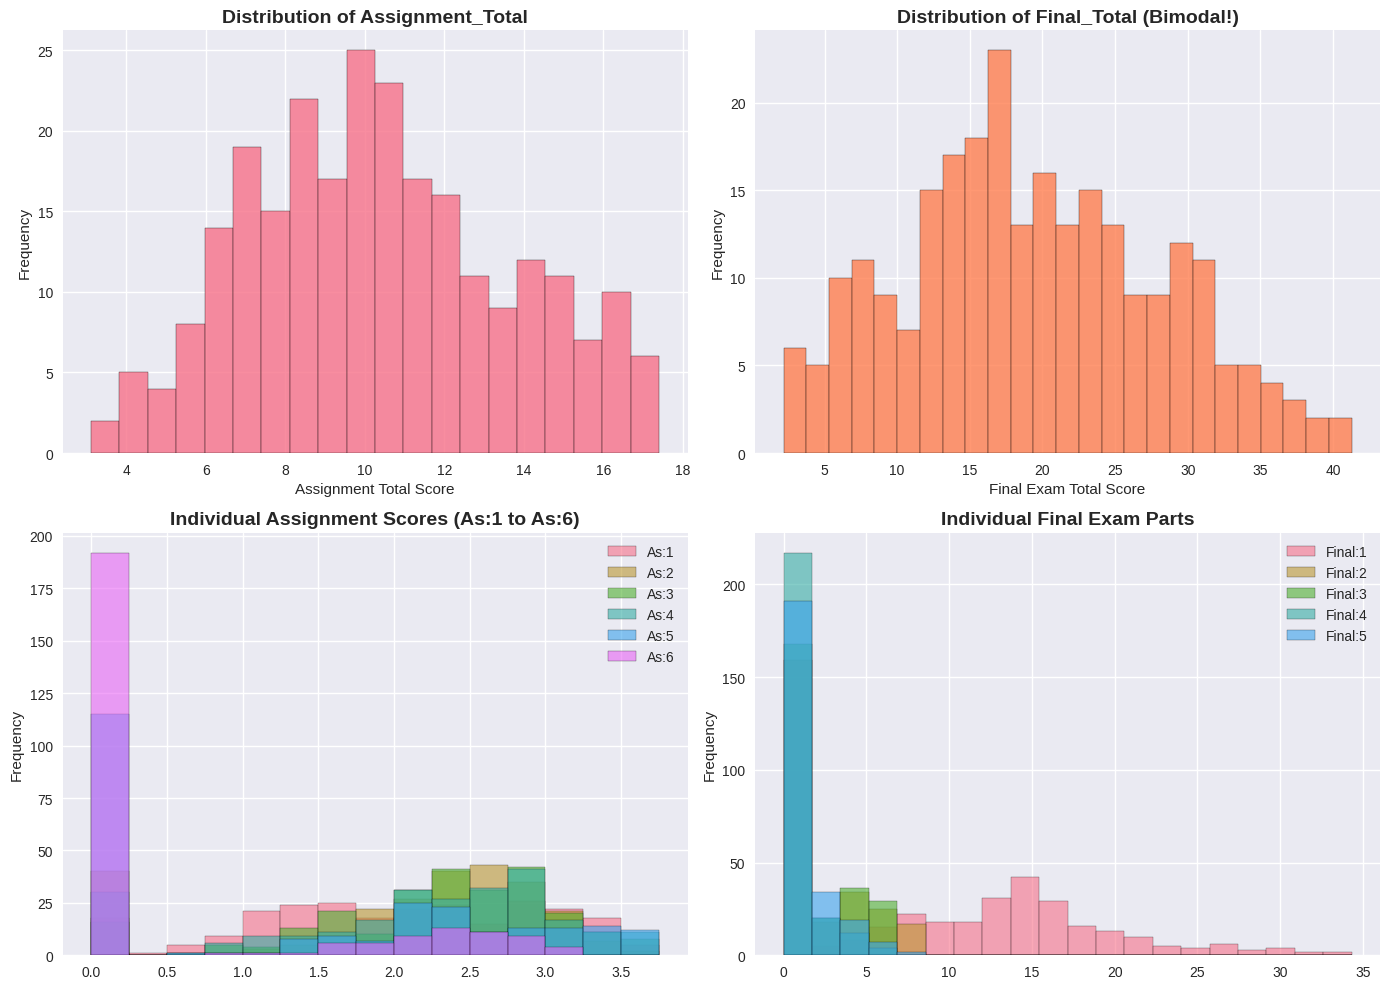

/tmp/ipython-input-68150293.py:55: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.scatterplot(data=df, x='Assignment_Total', y='Final_Total',


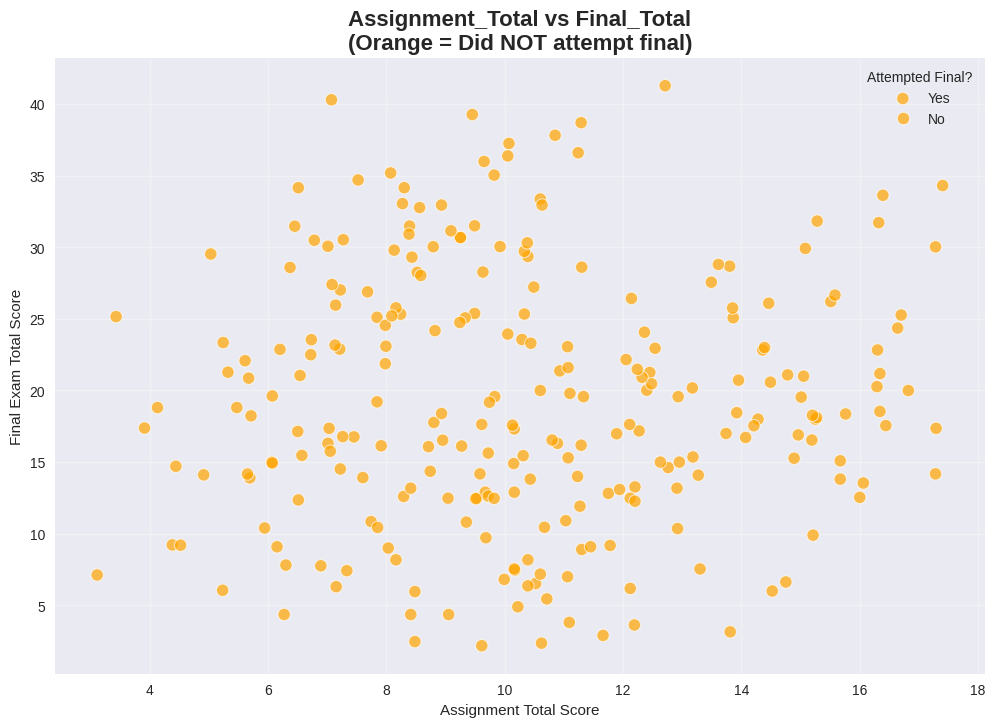

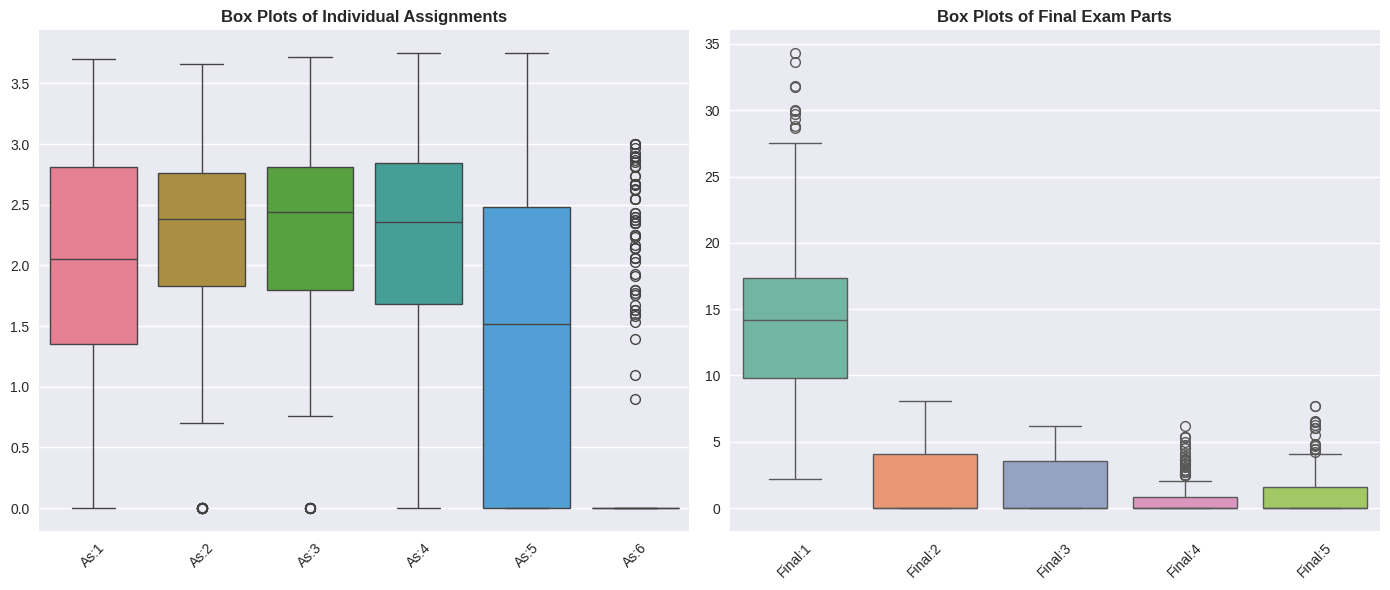

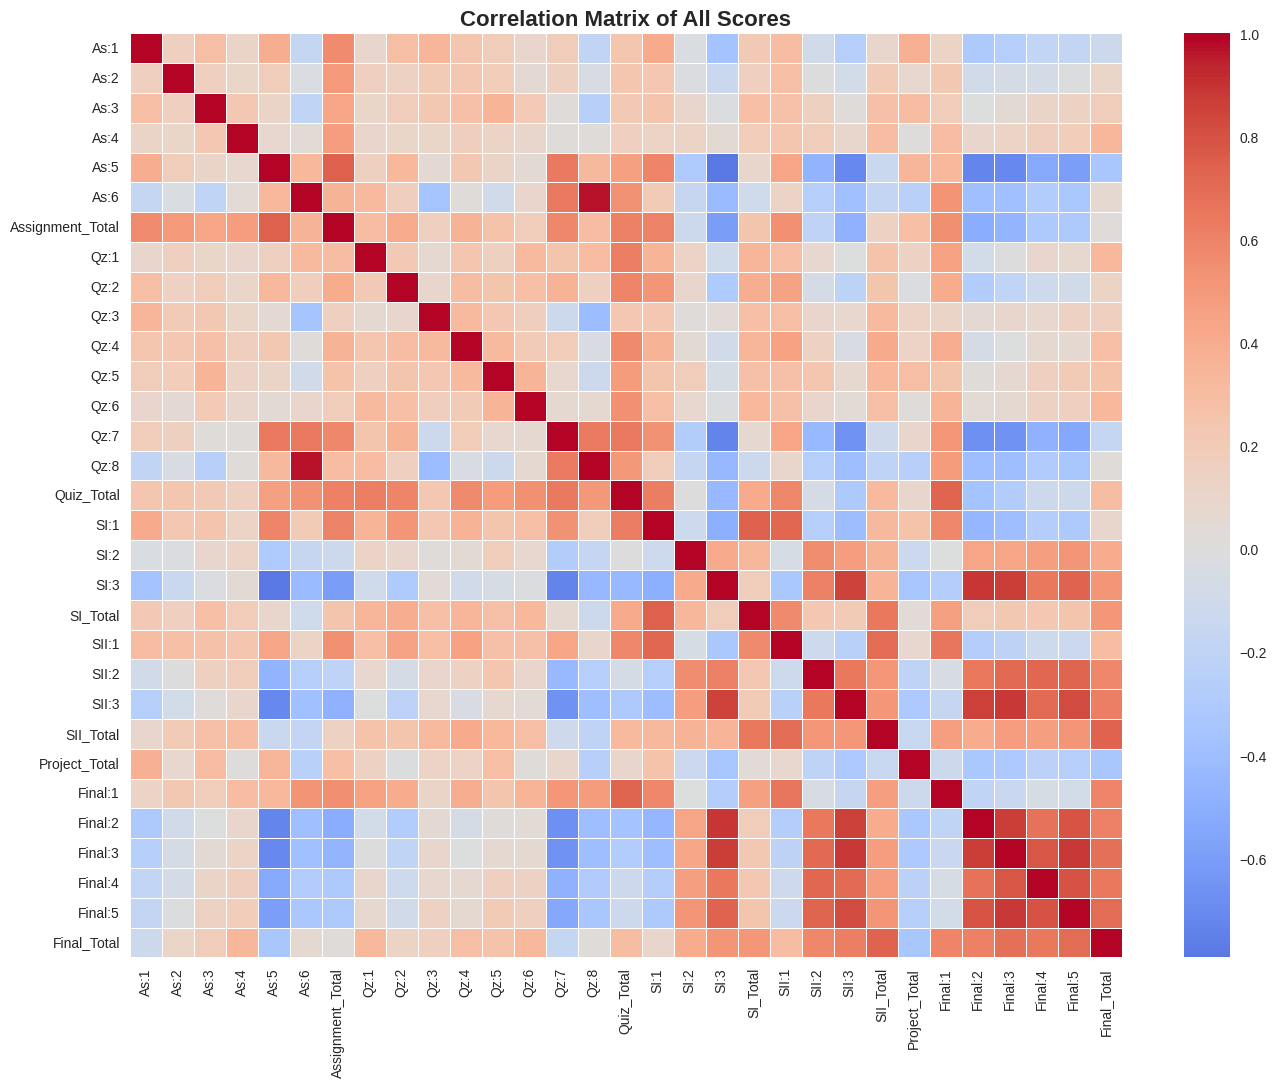


Top 10 features most correlated with Final_Total:
SII_Total    0.740322
Final:5      0.694683
Final:3      0.679106
Final:4      0.649949
SII:3        0.615783
Final:2      0.610321
Final:1      0.597136
SII:2        0.581541
SI:3         0.517257
SI_Total     0.516169
Name: Final_Total, dtype: float64


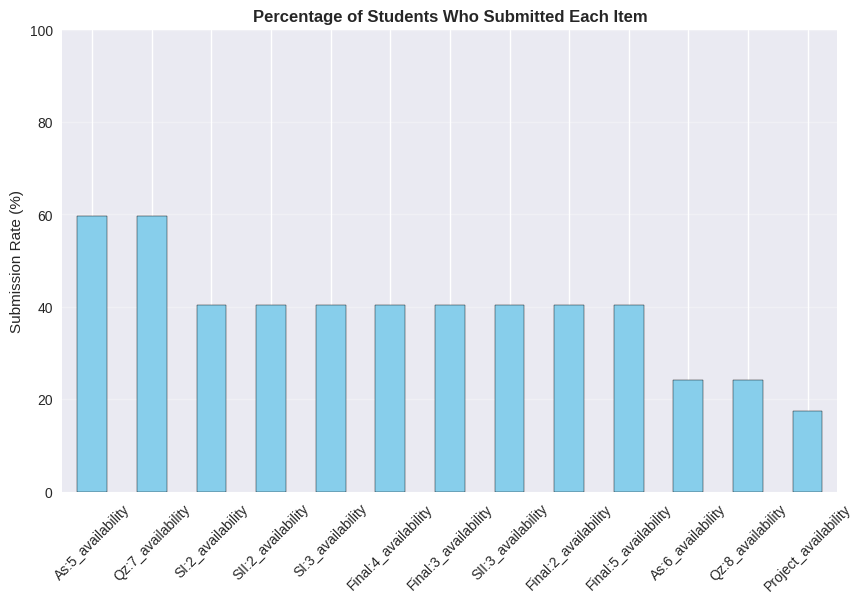


Students who scored exactly 0 on final: 0 (0.0%)
Average Assignment_Total among them: nan


In [20]:
# EDA

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

from io import StringIO
df = Dataset
df = df.iloc[1:]
df = df.reset_index(drop=True)

# Convert all to numeric
df = df.apply(pd.to_numeric, errors='ignore')

print(f"Dataset loaded: {df.shape}")
print(df.head())

# ------------------- 2. BASIC INFO -------------------
print("\n" + "="*60)
print("BASIC DATASET INFO")
print("="*60)
print(df.info())
print("\nMissing values:\n", df.isnull().sum()[df.isnull().sum() > 0])

# ------------------- 3. HISTOGRAMS -------------------
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Assignment Total
axes[0,0].hist(df['Assignment_Total'], bins=20, edgecolor='black', alpha=0.8)
axes[0,0].set_title('Distribution of Assignment_Total', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Assignment Total Score')
axes[0,0].set_ylabel('Frequency')

# Final Total
axes[0,1].hist(df['Final_Total'], bins=25, edgecolor='black', alpha=0.8, color='coral')
axes[0,1].set_title('Distribution of Final_Total (Bimodal!)', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Final Exam Total Score')
axes[0,1].set_ylabel('Frequency')

# Individual Assignments
assignment_cols = [c for c in df.columns if c.startswith('As:') and '_' not in c]
df[assignment_cols].plot(kind='hist', alpha=0.6, bins=15, ax=axes[1,0], edgecolor='black')
axes[1,0].set_title('Individual Assignment Scores (As:1 to As:6)', fontsize=14, fontweight='bold')

# Final parts
final_cols = [c for c in df.columns if c.startswith('Final:') and '_' not in c]
df[final_cols].plot(kind='hist', alpha=0.6, bins=20, ax=axes[1,1], edgecolor='black')
axes[1,1].set_title('Individual Final Exam Parts', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# ------------------- 4. SCATTER PLOT: Assignment vs Final -------------------
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Assignment_Total', y='Final_Total',
                alpha=0.7, s=80, hue=(df['Final_Total']==0), palette=['orange','blue'], legend='full')
plt.title('Assignment_Total vs Final_Total\n(Orange = Did NOT attempt final)', fontsize=16, fontweight='bold')
plt.xlabel('Assignment Total Score')
plt.ylabel('Final Exam Total Score')
plt.legend(title='Attempted Final?', labels=['Yes', 'No'])
plt.grid(True, alpha=0.3)
plt.show()

# ------------------- 5. BOX PLOTS -------------------
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(data=df[assignment_cols], ax=axes[0])
axes[0].set_title('Box Plots of Individual Assignments', fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)

sns.boxplot(data=df[final_cols], ax=axes[1], palette='Set2')
axes[1].set_title('Box Plots of Final Exam Parts', fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# ------------------- 6. CORRELATION HEATMAP -------------------
# Select only score columns (exclude availability flags)
score_cols = [c for c in df.columns if not c.endswith('_availability')]
corr = df[score_cols].corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr, cmap='coolwarm', center=0, annot=False, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of All Scores', fontsize=16, fontweight='bold')
plt.show()

# Top correlations with Final_Total
print("\nTop 10 features most correlated with Final_Total:")
print(corr['Final_Total'].drop('Final_Total').sort_values(key=abs, ascending=False).head(10))

# ------------------- 7. PARTICIPATION RATE -------------------
avail_cols = [c for c in df.columns if c.endswith('_availability')]
participation = df[avail_cols].mean() * 100

plt.figure(figsize=(10, 6))
participation.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Percentage of Students Who Submitted Each Item', fontweight='bold')
plt.ylabel('Submission Rate (%)')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.grid(axis='y', alpha=0.3)
plt.show()

print(f"\nStudents who scored exactly 0 on final: {(df['Final_Total'] == 0).sum()} ({(df['Final_Total'] == 0).mean()*100:.1f}%)")
print(f"Average Assignment_Total among them: {df[df['Final_Total']==0]['Assignment_Total'].mean():.2f}")


Dataset: 254 students × 44 columns
Features used:
  RQ1 (Mid I): ['As:1', 'As:2', 'As:3', 'Qz:1', 'Qz:2', 'Qz:3']
  RQ2 (Mid II): ['As:1', 'As:2', 'As:3', 'As:4', 'Qz:1', 'Qz:2', 'Qz:3', 'Qz:4', 'Qz:5', 'Qz:6', 'SI:1', 'SI:2', 'SI:2_availability', 'SI:3', 'SI:3_availability', 'SI_Total']  ← includes SI_Total!
  RQ3 (Final): 25 score columns
Starting evaluation...


RQ1: Predicting Midterm I (SI_Total)
             Model   MAE  RMSE     R²   95% CI MAE
      Dummy (Mean) 1.938 2.446 -0.013 [1.86, 2.44]
   Multiple Linear 1.612 1.970  0.343 [1.55, 2.11]
Polynomial (deg=2) 1.593 2.054  0.286 [1.55, 2.13]

→ BEST MODEL: Multiple Linear | R² = 0.343 | MAE = 1.61
   Train R²: 0.298 | Test R²: 0.343
   Good generalization.


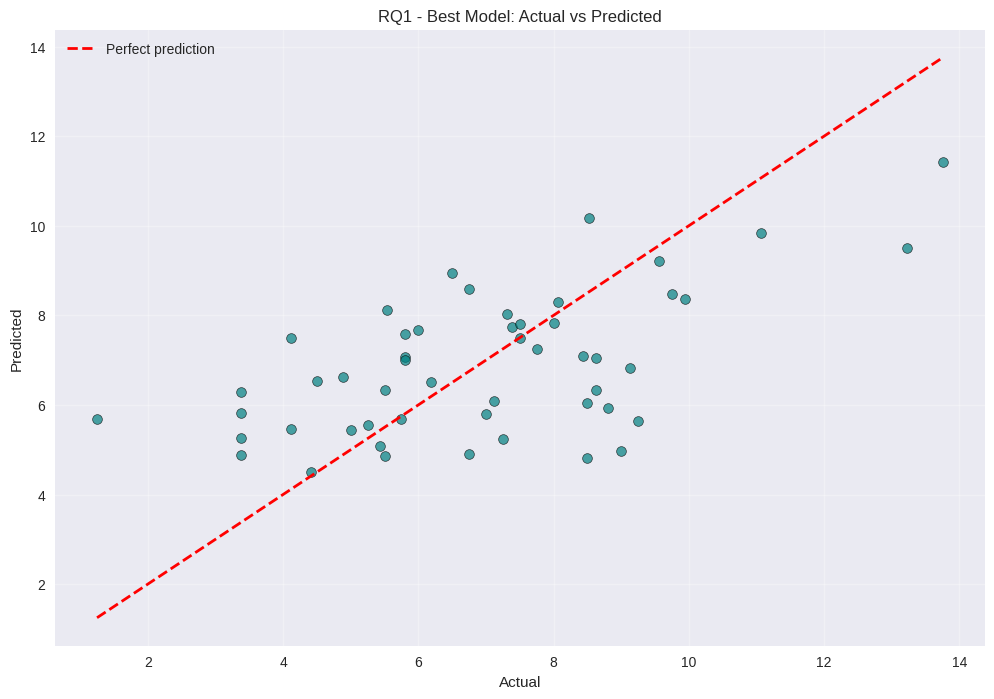


RQ2: Predicting Midterm II (SII_Total)
             Model   MAE  RMSE     R²   95% CI MAE
      Dummy (Mean) 2.606 3.236 -0.012 [2.48, 3.10]
   Multiple Linear 1.552 1.880  0.658 [1.65, 2.22]
Polynomial (deg=2) 3.374 5.336 -1.752 [1.67, 2.22]

→ BEST MODEL: Multiple Linear | R² = 0.658 | MAE = 1.55
   Train R²: 0.585 | Test R²: 0.658
   Good generalization.


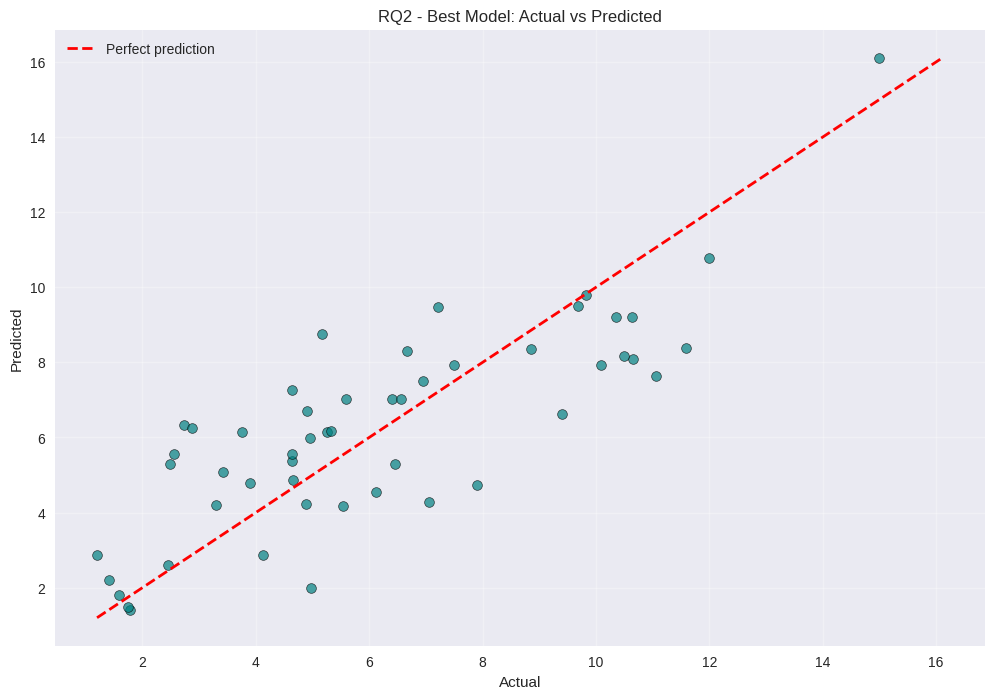


RQ3: Predicting Final Exam (Final_Total)
             Model    MAE    RMSE       R²   95% CI MAE
      Dummy (Mean)  7.615   9.124   -0.015 [6.18, 8.13]
   Multiple Linear  3.991   4.746    0.725 [2.97, 4.04]
Polynomial (deg=2) 84.321 153.416 -286.112 [2.95, 4.06]

→ BEST MODEL: Multiple Linear | R² = 0.725 | MAE = 3.99
   Train R²: 0.810 | Test R²: 0.725
   Good generalization.


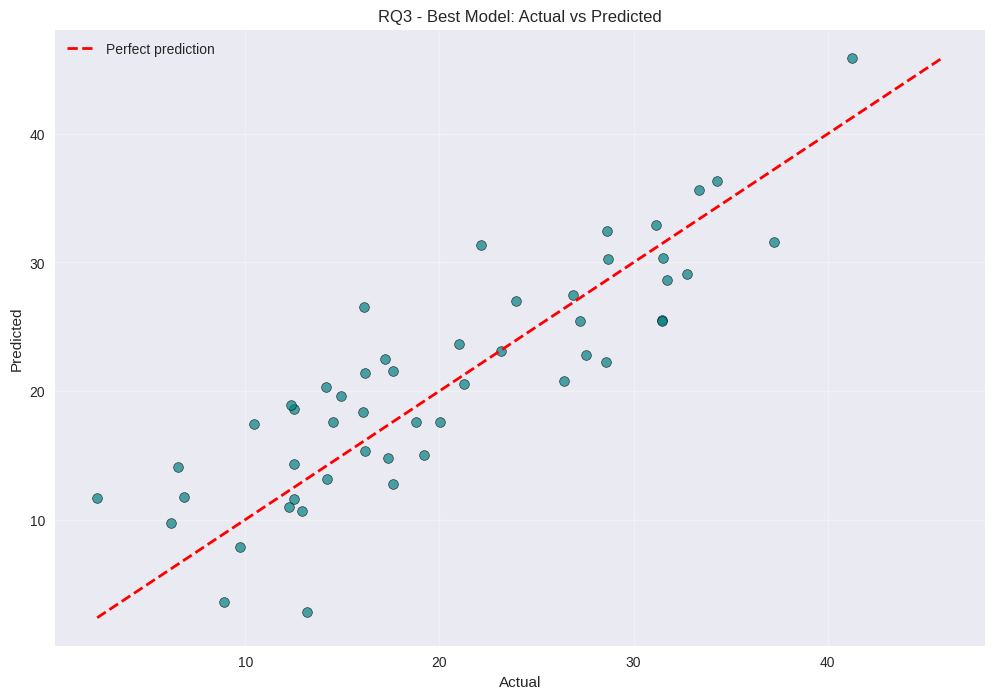

In [37]:
# ------------------- LOAD YOUR CLEANED DATA -------------------
df = Dataset
# df = your_dataframe_here

print(f"Dataset: {df.shape[0]} students × {df.shape[1]} columns")

# ------------------- TARGETS -------------------
y1 = df['SI_Total']       # Midterm I
y2 = df['SII_Total']      # Midterm II
y3 = df['Final_Total']    # Final Exam

# ------------------- FEATURES (UPDATED!) -------------------
X1 = df[["As:1", "As:2", "As:3", "Qz:1", "Qz:2", "Qz:3"]]

X2 = df[["As:1", "As:2", "As:3", "As:4",
         "Qz:1", "Qz:2", "Qz:3", "Qz:4", "Qz:5", "Qz:6",
         "SI:1", "SI:2", "SI:2_availability", "SI:3",
        "SI:3_availability", "SI_Total"]]

X3 = df[[
   "As:1", "As:2", "As:3", "As:4", "As:5", "As:5_availability",
    "As:6", "As:6_availability", "Assignment_Total",

    "Qz:1", "Qz:2", "Qz:3", "Qz:4", "Qz:5", "Qz:6", "Qz:7",
    "Qz:7_availability", "Qz:8", "Qz:8_availability", "Quiz_Total",

    "SI_Total",
    "SII_Total",

    "Project_availability", "Project_Total",
]]
print(f"Features used:")
print(f"  RQ1 (Mid I): {list(X1.columns)}")
print(f"  RQ2 (Mid II): {list(X2.columns)}  ← includes SI_Total!")
print(f"  RQ3 (Final): {len(score_cols)} score columns")

# ------------------- BOOTSTRAP 95% CI FOR MAE (on train data only) -------------------
def bootstrap_mae_ci(X_train, y_train, model_fn, n_boot=500):
    maes = []
    for i in range(n_boot):
        # Bootstrap sample
        boot_idx = resample(np.arange(len(X_train)), replace=True, random_state=i)
        oob_idx = np.setdiff1d(np.arange(len(X_train)), boot_idx)
        if len(oob_idx) < 10:
            continue
        X_boot, y_boot = X_train.iloc[boot_idx], y_train.iloc[boot_idx]
        X_oob, y_oob = X_train.iloc[oob_idx], y_train.iloc[oob_idx]

        model = model_fn()
        model.fit(X_boot, y_boot)
        mae_oob = mean_absolute_error(y_oob, model.predict(X_oob))
        maes.append(mae_oob)

    return np.percentile(maes, [2.5, 97.5]) if maes else (np.nan, np.nan)

# ------------------- EVALUATION FUNCTION -------------------
def evaluate_rq(X, y, rq_name, target_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=None)

    results = []

    # 1. Dummy (mean)
    dummy = DummyRegressor(strategy='mean')
    dummy.fit(X_train, y_train)
    pred_d = dummy.predict(X_test)
    ci_d = bootstrap_mae_ci(X_train, y_train, lambda: DummyRegressor(strategy='mean'))
    results.append({
        'Model': 'Dummy (Mean)',
        'MAE': mean_absolute_error(y_test, pred_d),
        'RMSE': np.sqrt(mean_squared_error(y_test, pred_d)),
        'R²': r2_score(y_test, pred_d),
        '95% CI MAE': f"[{ci_d[0]:.2f}, {ci_d[1]:.2f}]" if not np.isnan(ci_d[0]) else "N/A"
    })

    # 2. Multiple Linear Regression
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    pred_lr = lr.predict(X_test)
    ci_lr = bootstrap_mae_ci(X_train, y_train, lambda: LinearRegression())
    results.append({
        'Model': 'Multiple Linear',
        'MAE': mean_absolute_error(y_test, pred_lr),
        'RMSE': np.sqrt(mean_squared_error(y_test, pred_lr)),
        'R²': r2_score(y_test, pred_lr),
        '95% CI MAE': f"[{ci_lr[0]:.2f}, {ci_lr[1]:.2f}]"
    })

    # 3. Polynomial Degree 2
    poly = PolynomialFeatures(degree=2, include_bias=False)
    X_train_p = poly.fit_transform(X_train)
    X_test_p = poly.transform(X_test)
    poly_lr = LinearRegression()
    poly_lr.fit(X_train_p, y_train)
    pred_poly = poly_lr.predict(X_test_p)

    def poly_model():
        m = LinearRegression()
        m.fit(poly.fit_transform(X_train), y_train)
        return m
    ci_poly = bootstrap_mae_ci(X_train, y_train, poly_model, n_boot=300)  # faster
    results.append({
        'Model': 'Polynomial (deg=2)',
        'MAE': mean_absolute_error(y_test, pred_poly),
        'RMSE': np.sqrt(mean_squared_error(y_test, pred_poly)),
        'R²': r2_score(y_test, pred_poly),
        '95% CI MAE': f"[{ci_poly[0]:.2f}, {ci_poly[1]:.2f}]" if not np.isnan(ci_poly[0]) else "N/A"
    })

    # Show table
    table = pd.DataFrame(results).round(3)
    print(f"\n{'='*70}")
    print(f"{rq_name}: Predicting {target_name}")
    print('='*70)
    print(table.to_string(index=False))

    # Best model
    best = table.loc[table['R²'].idxmax()]
    print(f"\n→ BEST MODEL: {best['Model']} | R² = {best['R²']:.3f} | MAE = {best['MAE']:.2f}")

    # Train vs Test R² for best model
    if 'Polynomial' in best['Model']:
        train_pred = poly_lr.predict(X_train_p)
        print(f"   Train R²: {r2_score(y_train, train_pred):.3f} | Test R²: {best['R²']:.3f}")
    else:
        train_pred = lr.predict(X_train)
        print(f"   Train R²: {r2_score(y_train, train_pred):.3f} | Test R²: {best['R²']:.3f}")

    if r2_score(y_train, train_pred) - best['R²'] > 0.10:
        print("   Slight overfitting detected.")
    else:
        print("   Good generalization.")

    # Plot best predictions
    best_pred = pred_poly if 'Polynomial' in best['Model'] else pred_lr if 'Linear' in best['Model'] else pred_d
    plt.figure()
    plt.scatter(y_test, best_pred, alpha=0.7, color='teal', edgecolors='k', linewidth=0.5)
    min_val, max_val = min(y_test.min(), best_pred.min()), max(y_test.max(), best_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect prediction')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'{rq_name} - Best Model: Actual vs Predicted')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

    return table

# ------------------- RUN ALL RQs -------------------
print("Starting evaluation...\n")

table1 = evaluate_rq(X1, y1, "RQ1", "Midterm I (SI_Total)")
table2 = evaluate_rq(X2, y2, "RQ2", "Midterm II (SII_Total)")
table3 = evaluate_rq(X3, y3, "RQ3", "Final Exam (Final_Total)")

In [38]:
# ------------------ FINAL SUMMARY TABLE ------------------

# Add an exam label to each table
table1_summary = table1.copy()
table1_summary.insert(0, "Exam", "Midterm I")

table2_summary = table2.copy()
table2_summary.insert(0, "Exam", "Midterm II")

table3_summary = table3.copy()
table3_summary.insert(0, "Exam", "Final Exam")

# Combine into one final table
final_summary = pd.concat([table1_summary, table2_summary, table3_summary], ignore_index=True)

# Display final summary
print("\n==================== OVERALL MODEL PERFORMANCE SUMMARY ====================")
print(final_summary.to_string(index=False))



==================== OVERALL MODEL PERFORMANCE SUMMARY ====================
      Exam              Model    MAE    RMSE       R²   95% CI MAE
 Midterm I       Dummy (Mean)  1.938   2.446   -0.013 [1.86, 2.44]
 Midterm I    Multiple Linear  1.612   1.970    0.343 [1.55, 2.11]
 Midterm I Polynomial (deg=2)  1.593   2.054    0.286 [1.55, 2.13]
Midterm II       Dummy (Mean)  2.606   3.236   -0.012 [2.48, 3.10]
Midterm II    Multiple Linear  1.552   1.880    0.658 [1.65, 2.22]
Midterm II Polynomial (deg=2)  3.374   5.336   -1.752 [1.67, 2.22]
Final Exam       Dummy (Mean)  7.615   9.124   -0.015 [6.18, 8.13]
Final Exam    Multiple Linear  3.991   4.746    0.725 [2.97, 4.04]
Final Exam Polynomial (deg=2) 84.321 153.416 -286.112 [2.95, 4.06]


In [39]:
# Save the combined summary table as CSV
final_summary.to_csv("Final_Model_Performance_Summary.csv", index=False)

files.download("Final_Model_Performance_Summary.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>